In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../input/../input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv", sep=",")
df.T

,0,1,2,3,4,5,6,7,8,9,...,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
state,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV,...,IN,WV,OH,OH,SC,AZ,WV,RI,CT,TN
account length,128,107,137,84,75,118,121,147,117,141,...,117,159,78,96,79,192,68,28,184,74
area code,415,415,415,408,415,510,510,415,408,415,...,415,415,408,415,415,415,415,510,510,415
phone number,382-4657,371-7191,358-1921,375-9999,330-6626,391-8027,355-9993,329-9001,335-4719,330-8173,...,362-5899,377-1164,368-8555,347-6812,348-3830,414-4276,370-3271,328-8230,364-6381,400-4344
international plan,no,no,no,yes,yes,yes,no,yes,no,yes,...,no,no,no,no,no,no,no,no,yes,no
voice mail plan,yes,yes,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,no,no,no,yes
number vmail messages,25,26,0,0,0,0,24,0,0,37,...,0,0,0,0,0,36,0,0,0,25
total day minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6,...,118.4,169.8,193.4,106.6,134.7,156.2,231.1,180.8,213.8,234.4
total day calls,110,123,114,71,113,98,88,79,97,84,...,126,114,99,128,98,77,57,109,105,113
total day charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96,...,20.13,28.87,32.88,18.12,22.9,26.55,39.29,30.74,36.35,39.85


# 1.Постановка задачи - определить что приводит к оттоку клиентов на основе тарифов мобильной связи.
# 2.Наш таргет - столбец "churn", задача - категорильная т.к таргет представляет собой категориальный тип данных.

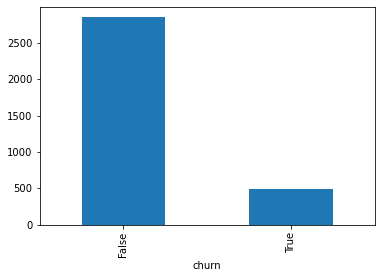

In [3]:
df.groupby("churn")["phone number"].count().plot(kind='bar')

# 3.Из диаграммы видно, что в выборке большая часть клиентов - это те, которые отказались от услуг оператора, отсюда можем сделать вывод, что распределение не нормальное.

In [4]:
df["state"].value_counts().shape[0]

51

# Т.к штатов очень много, а преобразовать мы их можем только с помощью getdummies(), то добавлять 51 столбец в таблицу считаю нецелесообразным т.к каждый штат содержит маленькое количество людей, причем различия по штатам очень незначительные, значит какой-либо значимой информации эта фича нам не даст. Уберем ее из таблицы.

# Телефонный номер по логике никак не влияет на таргет ибо по-сути является неким вариантом id пользователя, так что его тоже уберем из таблицы.

In [5]:
df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [6]:
df1 = df.drop(["state", "phone number"], axis=1)
df2 = df1.copy()

df2["area code"] = df['area code'].map({408:0,415:1,510:2})
df2["international plan"] = df['international plan'].map({"no":0,"yes":1})
df2["voice mail plan"] = df['voice mail plan'].map({"no":0,"yes":1})
df2["churn"] = df['churn'].map({False:0,True:1})

df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df_without_target = df2.drop(["churn"], axis=1)
df_without_target.head() 

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [8]:
X = df_without_target
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
from sklearn.model_selection import train_test_split

y = df2["churn"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=2019)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree = DecisionTreeClassifier(max_depth=3, random_state=2019)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_valid)
f1_score(y_valid, y_pred)

0.5838509316770186

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [12]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': np.arange(2, 20)}

tree_grid_depth = GridSearchCV(tree, tree_params, cv=kf, scoring='f1')
tree_grid_depth.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [13]:
tree_grid_depth.best_params_

{'max_depth': 6}

In [14]:
tree_grid_depth.best_score_

0.7665506255740062

Text(0, 0.5, 'f1_score')

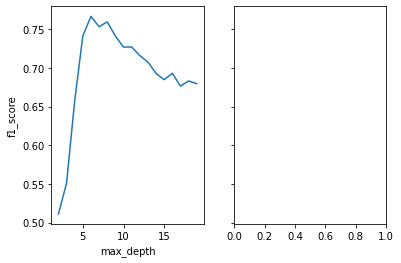

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(tree_params['max_depth'], tree_grid_depth.cv_results_['mean_test_score']) 
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('f1_score')

In [16]:
tree = DecisionTreeClassifier(max_depth=6, random_state=2019)
tree_params = {'min_samples_split': np.arange(2, 20)}

tree_grid_split = GridSearchCV(tree, tree_params, cv=kf, scoring='f1')
tree_grid_split.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=6, random_state=2019),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [17]:
tree_grid_split.best_params_

{'min_samples_split': 2}

In [18]:
tree_grid_split.best_score_

0.7665506255740062

Text(0, 0.5, 'f1_score')

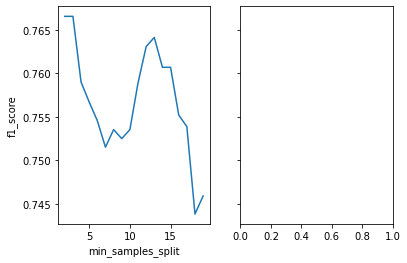

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(tree_params['min_samples_split'], tree_grid_split.cv_results_['mean_test_score']) 
ax[0].set_xlabel('min_samples_split')
ax[0].set_ylabel('f1_score')

In [20]:
tree = DecisionTreeClassifier(max_depth=8, min_samples_split=2, random_state=2019)
tree_params = {'min_samples_leaf': np.arange(2, 20)}

tree_grid_leaf = GridSearchCV(tree, tree_params, cv=kf, scoring='f1')
tree_grid_leaf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=8, random_state=2019),
             param_grid={'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [21]:
tree_grid_leaf.best_params_

{'min_samples_leaf': 16}

In [22]:
tree_grid_leaf.best_score_

0.7634225138921636

Text(0, 0.5, 'f1_score')

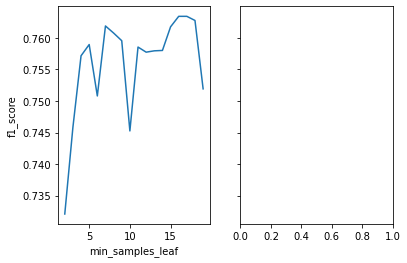

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(tree_params['min_samples_leaf'], tree_grid_leaf.cv_results_['mean_test_score']) 
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_ylabel('f1_score')

In [24]:
tree = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=16, random_state=2019)
tree_params = {'max_features': np.arange(2, 18)}

tree_grid_features = GridSearchCV(tree, tree_params, cv=kf, scoring='f1')
tree_grid_features.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=8, min_samples_leaf=16,
                                              random_state=2019),
             param_grid={'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])},
             scoring='f1')

In [25]:
tree_grid_features.best_params_

{'max_features': 13}

In [26]:
tree_grid_features.best_score_

0.7634225138921636

Text(0, 0.5, 'f1_score')

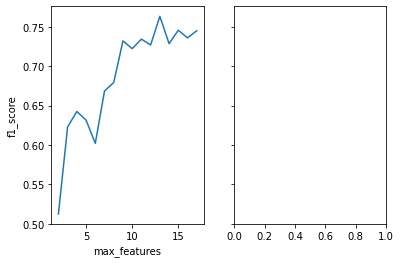

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(tree_params['max_features'], tree_grid_features.cv_results_['mean_test_score']) 
ax[0].set_xlabel('max_features')
ax[0].set_ylabel('f1_score')

Можно сделать вывод о том, что один из лучших наборов параметров это: max_depth=6, min_samples_leaf=16, min_samples_split=2, max_features=13.

Для удобства просмотра изображения дерева, уменьшим максимальную глубину до 3.

In [28]:
best_tree = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2, min_samples_leaf = 16, max_features = 13)
best_tree.fit(X_train, y_train)
mock_best_tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 16, max_features = 13)
mock_best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=13, min_samples_leaf=16)

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(mock_best_tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box] ;
0 [label="total day minutes <= 264.45\ngini = 0.244\nsamples = 2666\nvalue = [2286, 380]"] ;
1 [label="customer service calls <= 3.5\ngini = 0.198\nsamples = 2494\nvalue = [2216, 278]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="total day charge <= 37.715\ngini = 0.142\nsamples = 2294\nvalue = [2118, 176]"] ;
1 -> 2 ;
3 [label="gini = 0.1\nsamples = 1922\nvalue = [1821, 101]"] ;
2 -> 3 ;
4 [label="gini = 0.322\nsamples = 372\nvalue = [297, 75]"] ;
2 -> 4 ;
5 [label="total day charge <= 29.64\ngini = 0.5\nsamples = 200\nvalue = [98, 102]"] ;
1 -> 5 ;
6 [label="gini = 0.34\nsamples = 106\nvalue = [23, 83]"] ;
5 -> 6 ;
7 [label="gini = 0.323\nsamples = 94\nvalue = [75, 19]"] ;
5 -> 7 ;
8 [label="total eve minutes <= 149.1\ngini = 0.483\nsamples = 172\nvalue = [70, 102]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="gini = 0.111\nsamples = 17\nvalue = [16, 1]"] ;
8 -> 9 ;
10 [label="number vmail

![](data:image/svg+xml;charset=utf-8,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%3C!DOCTYPE%20svg%20PUBLIC%20%22-%2F%2FW3C%2F%2FDTD%20SVG%201.1%2F%2FEN%22%20%22http%3A%2F%2Fwww.w3.org%2FGraphics%2FSVG%2F1.1%2FDTD%2Fsvg11.dtd%22%3E%3C!--%20Generated%20by%20graphviz%20version%202.40.1%20(20161225.0304)%0A%20--%3E%3C!--%20Title%3A%20Tree%20Pages%3A%201%20--%3E%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22980pt%22%20height%3D%22400pt%22%20viewBox%3D%220.00%200.00%20980.04%20400.00%22%3E%0A%3Cg%20id%3D%22graph0%22%20class%3D%22graph%22%20transform%3D%22scale(1%201)%20rotate(0)%20translate(4%20396)%22%3E%0A%3Ctitle%3ETree%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22%23ffffff%22%20stroke%3D%22transparent%22%20points%3D%22-4%2C4%20-4%2C-396%20976.0356%2C-396%20976.0356%2C4%20-4%2C4%22%2F%3E%0A%3C!--%200%20--%3E%0A%3Cg%20id%3D%22node1%22%20class%3D%22node%22%3E%0A%3Ctitle%3E0%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22615.4892%2C-392.1003%20442.0464%2C-392.1003%20442.0464%2C-316.6997%20615.4892%2C-316.6997%20615.4892%2C-392.1003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22528.7678%22%20y%3D%22-375.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Etotal%20day%20minutes%20%26lt%3B%3D%20264.45%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22528.7678%22%20y%3D%22-358.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.244%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22528.7678%22%20y%3D%22-341.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%202666%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22528.7678%22%20y%3D%22-325%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B2286%2C%20380%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%201%20--%3E%0A%3Cg%20id%3D%22node2%22%20class%3D%22node%22%3E%0A%3Ctitle%3E1%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22487.6672%2C-280.9003%20307.8684%2C-280.9003%20307.8684%2C-205.4997%20487.6672%2C-205.4997%20487.6672%2C-280.9003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-264.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Ecustomer%20service%20calls%20%26lt%3B%3D%203.5%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-247.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.198%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-230.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%202494%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-213.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B2216%2C%20278%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%200%26%2345%3B%26gt%3B1%20--%3E%0A%3Cg%20id%3D%22edge1%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E0-%26gt%3B1%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M484.4172%2C-316.7528C473.3203%2C-307.3331%20461.3161%2C-297.1433%20449.8806%2C-287.4362%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22451.9615%2C-284.6116%20442.0728%2C-280.8085%20447.4315%2C-289.9482%20451.9615%2C-284.6116%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22444.1097%22%20y%3D%22-301.5254%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3ETrue%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%208%20--%3E%0A%3Cg%20id%3D%22node9%22%20class%3D%22node%22%3E%0A%3Ctitle%3E8%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22711.0775%2C-280.9003%20520.4581%2C-280.9003%20520.4581%2C-205.4997%20711.0775%2C-205.4997%20711.0775%2C-280.9003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-264.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Enumber%20vmail%20messages%20%26lt%3B%3D%206.5%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-247.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.483%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-230.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%20172%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-213.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B70%2C%20102%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%200%26%2345%3B%26gt%3B8%20--%3E%0A%3Cg%20id%3D%22edge8%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E0-%26gt%3B8%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M558.222%2C-316.7528C565.2374%2C-307.786%20572.7988%2C-298.1213%20580.0606%2C-288.8395%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22582.9385%2C-290.8411%20586.3439%2C-280.8085%20577.4253%2C-286.5278%20582.9385%2C-290.8411%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22589.3739%22%20y%3D%22-301.4242%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3EFalse%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%202%20--%3E%0A%3Cg%20id%3D%22node3%22%20class%3D%22node%22%3E%0A%3Ctitle%3E2%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22270.92%2C-169.7003%20116.6156%2C-169.7003%20116.6156%2C-94.2997%20270.92%2C-94.2997%20270.92%2C-169.7003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-153%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Einternational%20plan%20%26lt%3B%3D%200.5%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-136.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.142%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-119.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%202294%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-102.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B2118%2C%20176%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%201%26%2345%3B%26gt%3B2%20--%3E%0A%3Cg%20id%3D%22edge2%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E1-%26gt%3B2%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M328.7027%2C-205.5528C310.342%2C-195.5444%20290.3863%2C-184.6666%20271.5926%2C-174.4221%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22273.2172%2C-171.3215%20262.7618%2C-169.6085%20269.8669%2C-177.4677%20273.2172%2C-171.3215%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%205%20--%3E%0A%3Cg%20id%3D%22node6%22%20class%3D%22node%22%3E%0A%3Ctitle%3E5%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22477.4627%2C-169.7003%20318.0729%2C-169.7003%20318.0729%2C-94.2997%20477.4627%2C-94.2997%20477.4627%2C-169.7003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-153%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Etotal%20day%20charge%20%26lt%3B%3D%2029.64%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-136.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.5%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-119.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%20200%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22397.7678%22%20y%3D%22-102.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B98%2C%20102%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%201%26%2345%3B%26gt%3B5%20--%3E%0A%3Cg%20id%3D%22edge5%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E1-%26gt%3B5%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M397.7678%2C-205.5528C397.7678%2C-197.22%20397.7678%2C-188.2845%20397.7678%2C-179.6137%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22401.2679%2C-179.6084%20397.7678%2C-169.6085%20394.2679%2C-179.6085%20401.2679%2C-179.6084%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%203%20--%3E%0A%3Cg%20id%3D%22node4%22%20class%3D%22node%22%3E%0A%3Ctitle%3E3%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22119.3043%2C-58.6014%20.2313%2C-58.6014%20.2313%2C.2014%20119.3043%2C.2014%20119.3043%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%2259.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.088%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%2259.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%202092%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%2259.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B1995%2C%2097%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%202%26%2345%3B%26gt%3B3%20--%3E%0A%3Cg%20id%3D%22edge3%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E2-%26gt%3B3%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M144.632%2C-94.3048C132.0098%2C-84.6215%20118.4751%2C-74.2382%20106.0052%2C-64.6717%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22108.0493%2C-61.8285%2097.9847%2C-58.5186%20103.7885%2C-67.3824%20108.0493%2C-61.8285%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%204%20--%3E%0A%3Cg%20id%3D%22node5%22%20class%3D%22node%22%3E%0A%3Ctitle%3E4%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22249.8044%2C-58.6014%20137.7312%2C-58.6014%20137.7312%2C.2014%20249.8044%2C.2014%20249.8044%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.476%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%20202%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22193.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B123%2C%2079%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%202%26%2345%3B%26gt%3B4%20--%3E%0A%3Cg%20id%3D%22edge4%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E2-%26gt%3B4%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M193.7678%2C-94.3048C193.7678%2C-85.9126%20193.7678%2C-76.9946%20193.7678%2C-68.5382%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22197.2679%2C-68.5186%20193.7678%2C-58.5186%20190.2679%2C-68.5187%20197.2679%2C-68.5186%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%206%20--%3E%0A%3Cg%20id%3D%22node7%22%20class%3D%22node%22%3E%0A%3Ctitle%3E6%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22373.3044%2C-58.6014%20268.2312%2C-58.6014%20268.2312%2C.2014%20373.3044%2C.2014%20373.3044%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22320.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.34%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22320.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%20106%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22320.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B23%2C%2083%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%205%26%2345%3B%26gt%3B6%20--%3E%0A%3Cg%20id%3D%22edge6%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E5-%26gt%3B6%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M369.5331%2C-94.3048C362.7636%2C-85.2671%20355.5373%2C-75.6195%20348.778%2C-66.5954%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22351.5246%2C-64.4241%20342.7283%2C-58.5186%20345.922%2C-68.6207%20351.5246%2C-64.4241%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%207%20--%3E%0A%3Cg%20id%3D%22node8%22%20class%3D%22node%22%3E%0A%3Ctitle%3E7%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22497.3044%2C-58.6014%20392.2312%2C-58.6014%20392.2312%2C.2014%20497.3044%2C.2014%20497.3044%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22444.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.323%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22444.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2094%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22444.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B75%2C%2019%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%205%26%2345%3B%26gt%3B7%20--%3E%0A%3Cg%20id%3D%22edge7%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E5-%26gt%3B7%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M415.002%2C-94.3048C418.9654%2C-85.636%20423.1853%2C-76.406%20427.1641%2C-67.7034%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22430.3884%2C-69.0685%20431.3634%2C-58.5186%20424.0222%2C-66.1579%20430.3884%2C-69.0685%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%209%20--%3E%0A%3Cg%20id%3D%22node10%22%20class%3D%22node%22%3E%0A%3Ctitle%3E9%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22698.677%2C-169.7003%20532.8586%2C-169.7003%20532.8586%2C-94.2997%20698.677%2C-94.2997%20698.677%2C-169.7003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-153%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Etotal%20eve%20charge%20%26lt%3B%3D%2016.025%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-136.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.367%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-119.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%20128%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22615.7678%22%20y%3D%22-102.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B31%2C%2097%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%208%26%2345%3B%26gt%3B9%20--%3E%0A%3Cg%20id%3D%22edge9%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E8-%26gt%3B9%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M615.7678%2C-205.5528C615.7678%2C-197.22%20615.7678%2C-188.2845%20615.7678%2C-179.6137%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22619.2679%2C-179.6084%20615.7678%2C-169.6085%20612.2679%2C-179.6085%20619.2679%2C-179.6084%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%2012%20--%3E%0A%3Cg%20id%3D%22node13%22%20class%3D%22node%22%3E%0A%3Ctitle%3E12%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22879.5278%2C-169.7003%20732.0078%2C-169.7003%20732.0078%2C-94.2997%20879.5278%2C-94.2997%20879.5278%2C-169.7003%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-153%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Etotal%20eve%20calls%20%26lt%3B%3D%20107.5%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-136.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.201%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-119.4%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2044%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-102.6%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B39%2C%205%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%208%26%2345%3B%26gt%3B12%20--%3E%0A%3Cg%20id%3D%22edge12%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E8-%26gt%3B12%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M680.0931%2C-205.5528C696.9617%2C-195.6802%20715.2756%2C-184.9617%20732.5705%2C-174.8397%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22734.6461%2C-177.6803%20741.5087%2C-169.6085%20731.1103%2C-171.639%20734.6461%2C-177.6803%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%2010%20--%3E%0A%3Cg%20id%3D%22node11%22%20class%3D%22node%22%3E%0A%3Ctitle%3E10%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22621.3044%2C-58.6014%20516.2312%2C-58.6014%20516.2312%2C.2014%20621.3044%2C.2014%20621.3044%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22568.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.497%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22568.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2048%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22568.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B26%2C%2022%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%209%26%2345%3B%26gt%3B10%20--%3E%0A%3Cg%20id%3D%22edge10%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E9-%26gt%3B10%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M598.5336%2C-94.3048C594.5702%2C-85.636%20590.3503%2C-76.406%20586.3715%2C-67.7034%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22589.5134%2C-66.1579%20582.1722%2C-58.5186%20583.1472%2C-69.0685%20589.5134%2C-66.1579%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%2011%20--%3E%0A%3Cg%20id%3D%22node12%22%20class%3D%22node%22%3E%0A%3Ctitle%3E11%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22737.8045%2C-58.6014%20639.7311%2C-58.6014%20639.7311%2C.2014%20737.8045%2C.2014%20737.8045%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22688.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.117%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22688.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2080%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22688.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B5%2C%2075%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%209%26%2345%3B%26gt%3B11%20--%3E%0A%3Cg%20id%3D%22edge11%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E9-%26gt%3B11%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M642.5358%2C-94.3048C648.8882%2C-85.3593%20655.6648%2C-75.8163%20662.0164%2C-66.8718%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22665.0119%2C-68.6985%20667.9481%2C-58.5186%20659.3046%2C-64.6456%20665.0119%2C-68.6985%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%2013%20--%3E%0A%3Cg%20id%3D%22node14%22%20class%3D%22node%22%3E%0A%3Ctitle%3E13%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22854.8045%2C-58.6014%20756.7311%2C-58.6014%20756.7311%2C.2014%20854.8045%2C.2014%20854.8045%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.32%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2025%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22805.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B20%2C%205%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%2012%26%2345%3B%26gt%3B13%20--%3E%0A%3Cg%20id%3D%22edge13%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E12-%26gt%3B13%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M805.7678%2C-94.3048C805.7678%2C-85.9126%20805.7678%2C-76.9946%20805.7678%2C-68.5382%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22809.2679%2C-68.5186%20805.7678%2C-58.5186%20802.2679%2C-68.5187%20809.2679%2C-68.5186%22%2F%3E%0A%3C%2Fg%3E%0A%3C!--%2014%20--%3E%0A%3Cg%20id%3D%22node15%22%20class%3D%22node%22%3E%0A%3Ctitle%3E14%3C%2Ftitle%3E%0A%3Cpolygon%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20points%3D%22971.8045%2C-58.6014%20873.7311%2C-58.6014%20873.7311%2C.2014%20971.8045%2C.2014%20971.8045%2C-58.6014%22%2F%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22922.7678%22%20y%3D%22-41.8%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Egini%20%3D%200.0%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22922.7678%22%20y%3D%22-25%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Esamples%20%3D%2019%3C%2Ftext%3E%0A%3Ctext%20text-anchor%3D%22middle%22%20x%3D%22922.7678%22%20y%3D%22-8.2%22%20font-family%3D%22Times%2Cserif%22%20font-size%3D%2214.00%22%20fill%3D%22%23000000%22%3Evalue%20%3D%20%5B19%2C%200%5D%3C%2Ftext%3E%0A%3C%2Fg%3E%0A%3C!--%2012%26%2345%3B%26gt%3B14%20--%3E%0A%3Cg%20id%3D%22edge14%22%20class%3D%22edge%22%3E%0A%3Ctitle%3E12-%26gt%3B14%3C%2Ftitle%3E%0A%3Cpath%20fill%3D%22none%22%20stroke%3D%22%23000000%22%20d%3D%22M848.6699%2C-94.3048C859.4809%2C-84.806%20871.0585%2C-74.6335%20881.7732%2C-65.2192%22%2F%3E%0A%3Cpolygon%20fill%3D%22%23000000%22%20stroke%3D%22%23000000%22%20points%3D%22884.1972%2C-67.7484%20889.3993%2C-58.5186%20879.5769%2C-62.4899%20884.1972%2C-67.7484%22%2F%3E%0A%3C%2Fg%3E%0A%3C%2Fg%3E%0A%3C%2Fsvg%3E)

Feature ranking:
1 total day charge 0.26211058582177105
2 customer service calls 0.167126937284646
3 total eve minutes 0.15495816825152378
4 total intl minutes 0.09527190468854364
5 international plan 0.085553012721287
6 total intl calls 0.07673377482070065
7 voice mail plan 0.0657551008201138
8 total day minutes 0.06229957813246004
9 total night minutes 0.02067687593746032
10 total eve charge 0.006200402213845595


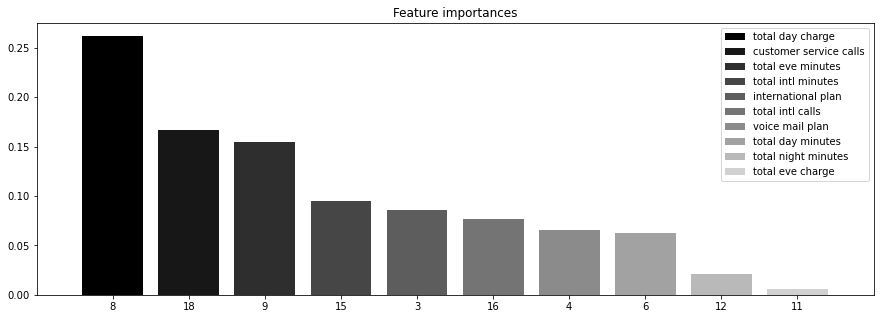

In [30]:
import matplotlib.pyplot as plt

features = {'f'+str(i+1):name for (i, name) in zip(range(len(df_without_target.columns)), df_without_target.columns)}

#Важность признаков

importances = best_tree.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features["f"+str(feature_indices[f])], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) for i in feature_indices]);

Можем сделать вывод о том, что судя по дереву решений, total day charge является самой полезной фичей, также неплохой фичей является customer service calls, в то время как total night minutes, number vmail messages и total eve minutes не являются существенными.

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

f1_score(y_valid, y_pred)

0.8817204301075269

In [32]:
rf_params = {"n_estimators":[50, 100, 150, 200, 300, 400, 450]}
rf_grid_estimators = GridSearchCV(rf, rf_params, cv=kf, scoring='f1')
rf_grid_estimators.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=2019),
             param_grid={'n_estimators': [50, 100, 150, 200, 300, 400, 450]},
             scoring='f1')

In [33]:
rf_grid_estimators.best_params_

{'n_estimators': 400}

In [34]:
rf_grid_estimators.best_score_

0.8105890008519129

Text(0, 0.5, 'f1_score')

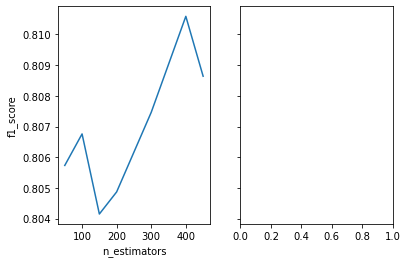

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rf_params['n_estimators'], rf_grid_estimators.cv_results_['mean_test_score']) 
ax[0].set_xlabel('n_estimators')
ax[0].set_ylabel('f1_score')

In [36]:
rf = RandomForestClassifier(n_estimators=400, random_state=2019)
rf_params = {'max_depth': np.arange(2, 20)}
rf_grid_depth = GridSearchCV(rf, rf_params, cv=kf, scoring='f1')
rf_grid_depth.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=400,
                                              random_state=2019),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [37]:
rf_grid_depth.best_params_

{'max_depth': 16}

In [38]:
rf_grid_depth.best_score_

0.813161879471388

Text(0, 0.5, 'f1_score')

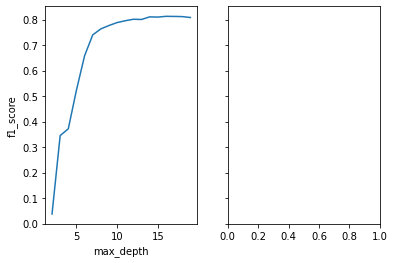

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rf_params['max_depth'], rf_grid_depth.cv_results_['mean_test_score']) 
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('f1_score')

In [40]:
rf = RandomForestClassifier(n_estimators=400, max_depth=16, random_state=2019)
rf_params = {'min_samples_split': np.arange(2, 20)}
rf_grid_split = GridSearchCV(rf, rf_params, cv=kf, scoring='f1')
rf_grid_split.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_depth=16, n_estimators=400,
                                              random_state=2019),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [41]:
rf_grid_split.best_params_

{'min_samples_split': 8}

In [42]:
rf_grid_split.best_score_

0.8140347255875435

Text(0, 0.5, 'f1_score')

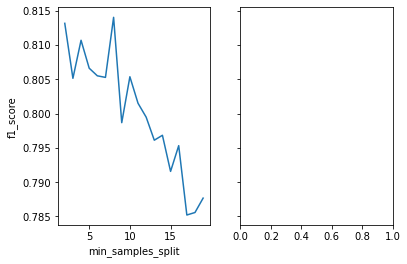

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rf_params['min_samples_split'], rf_grid_split.cv_results_['mean_test_score']) 
ax[0].set_xlabel('min_samples_split')
ax[0].set_ylabel('f1_score')

In [44]:
rf = RandomForestClassifier(n_estimators=400, max_depth=16, min_samples_split=8, random_state=2019)
rf_params = {'min_samples_leaf': np.arange(2, 20)}
rf_grid_leaf = GridSearchCV(rf, rf_params, cv=kf, scoring='f1')
rf_grid_leaf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_depth=16, min_samples_split=8,
                                              n_estimators=400,
                                              random_state=2019),
             param_grid={'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [45]:
rf_grid_leaf.best_params_

{'min_samples_leaf': 2}

In [46]:
rf_grid_leaf.best_score_

0.8008817846689512

Text(0, 0.5, 'f1_score')

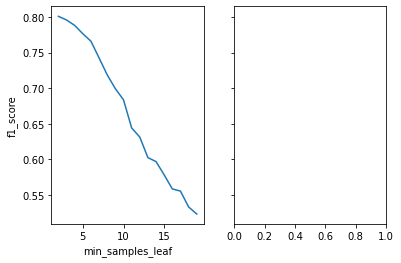

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rf_params['min_samples_leaf'], rf_grid_leaf.cv_results_['mean_test_score']) 
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_ylabel('f1_score')

In [48]:
rf = RandomForestClassifier(n_estimators=400, max_depth=16, min_samples_split=8, min_samples_leaf=2, random_state=2019)
rf_params = {'max_features': np.arange(2, 18)}
rf_grid_features = GridSearchCV(rf, rf_params, cv=kf, scoring='f1')
rf_grid_features.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_depth=16, min_samples_leaf=2,
                                              min_samples_split=8,
                                              n_estimators=400,
                                              random_state=2019),
             param_grid={'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])},
             scoring='f1')

In [49]:
rf_grid_features.best_params_

{'max_features': 11}

In [50]:
rf_grid_features.best_score_

0.8276274368807925

Text(0, 0.5, 'f1_score')

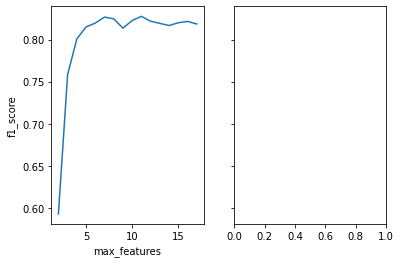

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)

ax[0].plot(rf_params['max_features'], rf_grid_features.cv_results_['mean_test_score']) 
ax[0].set_xlabel('max_features')
ax[0].set_ylabel('f1_score')

Можно сделать вывод о том, что один из лучших наборов параметров это n_estimators=400, max_depth=16, min_samples_split=8, min_samples_leaf=2, max_features=11

In [52]:
best_forest = RandomForestClassifier(n_estimators=400, max_depth=16, min_samples_split=8, min_samples_leaf=2, max_features=11)
best_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_features=11, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=400)

Feature ranking:
1 total day charge 0.14364444536642101
2 total day minutes 0.13900756590723493
3 customer service calls 0.12756339107358716
4 international plan 0.08823372356890025
5 total intl calls 0.07956346241113839
6 total eve minutes 0.07591386110053547
7 total eve charge 0.07589629630104704
8 total intl minutes 0.041874887688527145
9 total intl charge 0.04035713880497868
10 number vmail messages 0.03824473869469751


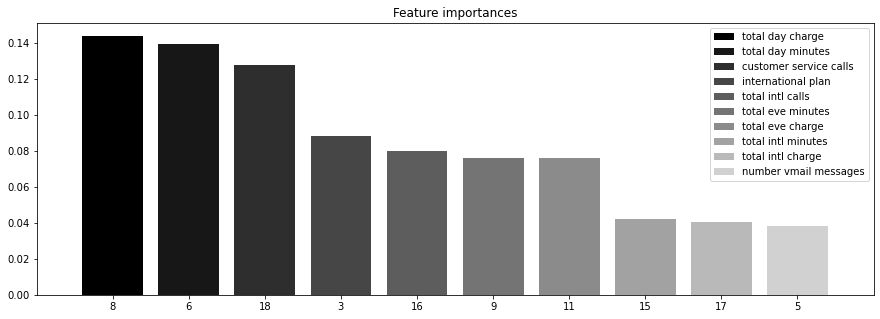

In [53]:
import matplotlib.pyplot as plt

features = {'f'+str(i+1):name for (i, name) in zip(range(len(df_without_target.columns)), df_without_target.columns)}

#Важность признаков

importances = best_forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features["f"+str(feature_indices[f])], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) for i in feature_indices]);

Видим, что случайный лес показал, что самыми полезными фичами являются total day charge, total day minutes и customer service calls, в то время как в дереве total day minutes был посередине "топа", total eve minutes стал более полезной фичей и теперь самыми неэффективными в "топе" являются number vmail messages и total intl minutes.

Сравнивая показатели f1_score knn метода, дерева решений и слуайного леса можем сделать вывод, что самая большая точность была у леса = 0.828, чуть похуже справилось дерево = 0.763 и метод knn дал почти в 2 раза меньшую точность = 0.496. Для нашего датасета лучше всего подошел именно лес, но интерпретация у него довольно сложная, так что как вариант в реальном кейсе можно бы было рассмотреть дерево у которого точность в данном случае не намного меньше но его легко объяснить и визуализировать, хотя если в датасет внести собираются вноситься изменения в дальнейшем, то дерево плохой вариант из-за своей неустойчивости.